# Data wrangling WeRateDogs
###### By Karim El-Dweky
## Introduction
The purpose of this project is to put in practice what I learned in data wrangling data section from Udacity Data Analysis Nanodegree program. The dataset that is wrangled is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.

In [98]:
# importing required libraries 
import pandas as pd
import numpy as np
import tweepy
import requests
import re
import json
import matplotlib.pyplot as plt
import datetime
import os
import seaborn as sns
from scipy import stats
from functools import reduce
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Gathering data
1. **Twitter archive file:** download this file manually by clicking the following link: twitter_archive_enhanced.csv
2. **The tweet image predictions**, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
3. **Twitter API & JSON:** Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

### 1. Twitter archive file

In [99]:
# Read CSV file 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.sort_values('timestamp')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2. Tweet image prediction

In [100]:
# URL downloaded programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
file_name = os.path.basename(url)
response = requests.get(url)

if not os.path.isfile(file_name):
    with open(file_name, 'wb') as f:
        f.write(response.content)

# Read TSV file
image_prediction = pd.read_csv(file_name, sep='\t' )
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3. Twitter API & JSON

In [101]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [102]:
# URL downloaded programatically 
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
filename = os.path.basename(url)
response = requests.get(url)

if not os.path.isfile(filename):
    with open(filename, 'wb') as f:
        f.write(response.content)

open(filename).readlines(1)

['{"created_at": "Tue Aug 01 16:23:56 +0000 2017", "id": 892420643555336193, "id_str": "892420643555336193", "full_text": "This is Phineas. He\'s a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", "truncated": false, "display_text_range": [0, 85], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 892420639486877696, "id_str": "892420639486877696", "indices": [86, 109], "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "url": "https://t.co/MgUWQ76dJU", "display_url": "pic.twitter.com/MgUWQ76dJU", "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1", "type": "photo", "sizes": {"large": {"w": 540, "h": 528, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 540, "h": 528, "resize": "fit"}, "medium": {"w": 540, "h": 528, "resize": "fit"}}}]}, "extended_entities": {"me

In [103]:
df_list = []

with open(filename, 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'followers_count': user_count})
        
api_df = pd.DataFrame(df_list)
api_df.head()

,favorite_count,followers_count,retweet_count,tweet_id
0,39467,3200889,8853,892420643555336193
1,33819,3200889,6514,892177421306343426
2,25461,3200889,4328,891815181378084864
3,42908,3200889,8964,891689557279858688
4,41048,3200889,9774,891327558926688256


## Data Assessment

### 1. Visuel Assessment

In [104]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [105]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [106]:
api_df

,favorite_count,followers_count,retweet_count,tweet_id
0,39467,3200889,8853,892420643555336193
1,33819,3200889,6514,892177421306343426
2,25461,3200889,4328,891815181378084864
3,42908,3200889,8964,891689557279858688
4,41048,3200889,9774,891327558926688256
5,20562,3200889,3261,891087950875897856
6,12041,3200889,2158,890971913173991426
7,56848,3200889,16716,890729181411237888
8,28226,3200889,4429,890609185150312448
9,32467,3200889,7711,890240255349198849


### 2. Programmatic assessment

In [107]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [108]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [109]:
sum(twitter_archive['tweet_id'].duplicated())

0

In [110]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [111]:
twitter_archive[twitter_archive['rating_denominator'] == 0 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [112]:
twitter_archive[twitter_archive['rating_denominator'] < 10 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [113]:
twitter_archive[twitter_archive['rating_denominator'] > 20 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,44,40,None,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None


In [114]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [115]:
twitter_archive[twitter_archive['rating_numerator'] == 0 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [116]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [117]:
twitter_archive[twitter_archive['rating_numerator'] > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [118]:
twitter_archive.query('tweet_id == 854010172552949760')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [119]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [120]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
retweet_count      2354 non-null int64
tweet_id           2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


In [121]:
api_df.describe()

,favorite_count,followers_count,retweet_count,tweet_id
count,2354.000000,2.354000e+03,2354.000000,2.354000e+03
mean,8080.968564,3.200942e+06,3164.797366,7.426978e+17
std,11814.771334,4.457302e+01,5284.770364,6.852812e+16
min,0.000000,3.200799e+06,0.000000,6.660209e+17
25%,1415.000000,3.200898e+06,624.500000,6.783975e+17
50%,3603.500000,3.200945e+06,1473.500000,7.194596e+17
75%,10122.250000,3.200953e+06,3652.000000,7.993058e+17
max,132810.000000,3.201018e+06,79515.000000,8.924206e+17


In [122]:
twitter_archive.duplicated().value_counts()

False    2356
dtype: int64

In [123]:
image_prediction.duplicated().value_counts()

False    2075
dtype: int64

In [124]:
api_df.duplicated().value_counts()

False    2354
dtype: int64

In [125]:
image_prediction.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
Cardigan                      19
web_site                      19
Maltese_dog                   18
teddy                         18
beagle                        18
Shetland_sheepdog             18
Eskimo_dog                    18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

In [126]:
rare_things= image_prediction.groupby('p1').filter(lambda x: len(x) < 3)

In [127]:
rare_things.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
28,666407126856765440,https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg,1,black-and-tan_coonhound,0.529139,True,bloodhound,0.244220,True,flat-coated_retriever,0.173810,True


In [128]:
len(rare_things)

271

In [129]:
api_df['tweet_id'].sample(5)

1956    673580926094458881
1056    741793263812808706
1074    739606147276148736
414     822647212903690241
2030    671763349865160704
Name: tweet_id, dtype: int64

In [130]:
twitter_archive[twitter_archive.tweet_id == 767884188863397888]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
836,767884188863397888,NaN,NaN,2016-08-23 00:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tito. He's on the lookout. Nobody know...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/767884188...,10,10,Tito,None,None,None,None


In [131]:
api_df[api_df.tweet_id == 767884188863397888]

,favorite_count,followers_count,retweet_count,tweet_id
834,5309,3200906,1634,767884188863397888


## Data Cleaning

In [132]:
twitter_archive_original = twitter_archive.copy()
image_prediction_original = image_prediction.copy()
api_df_original = api_df.copy()

### Cleaning twitter_archive

###### Define

#### 1. Use the image_prediction table to guide the selection and removal of tweets without photos in the archive table

###### Code

In [133]:
# creating a list of tweet_ids with images "tweets_with_image" and confirming its length
tweets_with_image = list(image_prediction.tweet_id.unique())

# confirming that all the tweets with images exist in the archive dataset
len(tweets_with_image) == twitter_archive.tweet_id.isin(tweets_with_image).sum()

# Cleaning in action ;)
twitter_archive = twitter_archive[twitter_archive.tweet_id.isin(tweets_with_image)]

###### Test

In [134]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
dtypes: float64(4), int64(3), objec

###### Define

#### 2. Keepping original ratings (no retweets and no reply) that have images.

###### Code

In [135]:
# Deleting retweets by filtering the NaN of retweeted_status_user_id
twitter_archive = twitter_archive[pd.isna(twitter_archive['retweeted_status_user_id'])]

###### Test

In [136]:
#TEST
twitter_archive.retweeted_status_user_id.value_counts().sum()

0

###### Code

In [137]:
# Deleting retweets by filtering the NaN of in_reply_to_user_id
twitter_archive = twitter_archive[pd.isna(twitter_archive['in_reply_to_user_id'])]

###### Test

In [138]:
#TEST
twitter_archive.in_reply_to_user_id.value_counts().sum()

0

###### Define

#### 3. Dropping unneeded columns

###### Code

In [139]:
# Code
unneeded_coulmns = ['in_reply_to_status_id',
                    'in_reply_to_user_id',
                    'source',
                    'retweeted_status_id',
                    'retweeted_status_user_id',
                    'retweeted_status_timestamp',
                    'expanded_urls']
twitter_archive.drop(unneeded_coulmns, axis=1, inplace=True)

###### Test

In [140]:
# Test
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
text                  1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
dtypes: int64(3), object(7)
memory usage: 169.4+ KB


###### Define

#### 4. Combine the doggo, floofer, pupper and puppo columns to dogs_stage column. Then dropping the 4 columns.

###### Code

In [141]:
# Converting all None in twitter_archive into empty string
twitter_archive.replace(to_replace='None', value='', inplace=True)

# Combinning the doggo, floofer, pupper and puppo columns to dogs_stage column
twitter_archive['dog_stage'] = twitter_archive['doggo'] + twitter_archive['floofer'] + twitter_archive['pupper'] + twitter_archive['puppo']

# Dropping the doggo, floofer, pupper and puppo columns
twitter_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

###### Test

In [142]:
# test
twitter_archive['dog_stage'].value_counts()

                1668
pupper           201
doggo             63
puppo             22
doggopupper        8
floofer            7
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [143]:
twitter_archive.query('tweet_id == 854010172552949760')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
200,854010172552949760,2017-04-17 16:34:26 +0000,"At first I thought this was a shy doggo, but i...",11,10,,doggofloofer


###### Define

#### 5. Separate timestamp into day - month - year (3 columns)

###### Code

In [144]:
# convert timestamp to datetime
twitter_archive['timestamp'] = pd.to_datetime(twitter_archive['timestamp'])

# extract year, month and day to new columns
twitter_archive['year'] = twitter_archive['timestamp'].dt.year
twitter_archive['month'] = twitter_archive['timestamp'].dt.month
twitter_archive['day'] = twitter_archive['timestamp'].dt.day

# Finally drop timestamp column
twitter_archive = twitter_archive.drop('timestamp', axis=1)

###### Test

In [145]:
#TEST
list(twitter_archive)

['tweet_id',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'year',
 'month',
 'day']

###### Define

#### 6. Converting 'rating_numerator' & 'rating_denominator' columns into float type

###### Code

In [146]:
# Code
twitter_archive[['rating_numerator', 'rating_denominator']] = twitter_archive[['rating_numerator','rating_denominator']].astype(float)

###### Test

In [147]:
#Test
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              1971 non-null int64
text                  1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
name                  1971 non-null object
dog_stage             1971 non-null object
year                  1971 non-null int64
month                 1971 non-null int64
day                   1971 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 154.0+ KB


###### Define

#### 7. creatting **rating** column out of dividing **rating_numerator** and the **rating_denominator** then dropping the last two columns.

###### Code

In [148]:
# creatting rating column out of dividing rating_numerator and the rating_denominator
twitter_archive['rating'] = twitter_archive['rating_numerator'] / twitter_archive['rating_denominator']

# Dropping rating_numerator and the rating_denominator column
twitter_archive.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

###### Test

In [149]:
#Test
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id     1971 non-null int64
text         1971 non-null object
name         1971 non-null object
dog_stage    1971 non-null object
year         1971 non-null int64
month        1971 non-null int64
day          1971 non-null int64
rating       1971 non-null float64
dtypes: float64(1), int64(4), object(3)
memory usage: 138.6+ KB


###### Define

#### 8. Cleaning rating column manually

###### Code

##### 8. 1. rating column assesment

In [150]:
twitter_archive.loc[twitter_archive.rating == 0]

,tweet_id,text,name,dog_stage,year,month,day,rating
315,835152434251116546,When you're so blinded by your systematic plag...,,,2017,2,24,0.0


In [151]:
print(twitter_archive['text'][315]) # to be deleted

When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag


In [152]:
twitter_archive.loc[twitter_archive.rating == 42, 'text']

2074    After so many requests... here you go.\n\nGood...
Name: text, dtype: object

In [153]:
print(twitter_archive['text'][2074]) # to be deleted

After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY


In [154]:
twitter_archive.loc[twitter_archive.rating == 7.5, 'text']

695    This is Logan, the Chow who lived. He solemnly...
Name: text, dtype: object

In [155]:
print(twitter_archive['text'][695]) # to be change manually to 0.975

This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS


In [156]:
twitter_archive.loc[twitter_archive.rating == 9/11, 'text']

1068    After so many requests, this is Bretagne. She ...
Name: text, dtype: object

In [157]:
print(twitter_archive['text'][1068]) # to be change manually to 1.4

After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ


In [158]:
twitter_archive.loc[twitter_archive.rating == 177.6, 'text']

979    This is Atticus. He's quite simply America af....
Name: text, dtype: object

In [159]:
print(twitter_archive['text'][979]) # to be deleted

This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh


In [160]:
twitter_archive.loc[twitter_archive.rating == 7/11, 'text']

1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object

In [161]:
print(twitter_archive['text'][1662]) # to be change manually to 1

This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5


In [162]:
twitter_archive.loc[twitter_archive.rating == 2.6, 'text']

1712    Here we have uncovered an entire battalion of ...
Name: text, dtype: object

In [163]:
print(twitter_archive['text'][1712]) # to be change manually to 0.6

Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


In [164]:
twitter_archive.loc[twitter_archive.rating == 2.7, 'text']

763    This is Sophie. She's a Jubilant Bush Pupper. ...
Name: text, dtype: object

In [165]:
print(twitter_archive['text'][763]) # to be change manually to 1.127

This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq


In [166]:
twitter_archive.loc[twitter_archive.rating == 24/7, 'text']

516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object

In [167]:
print(twitter_archive['text'][516]) # to be delete

Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


##### 8. 2. Deleting 4 raws without pic or rating or rating damaged

In [168]:
twitter_archive.drop([315, 2074, 979, 516], inplace=True)

##### 8. 3. changing values for 2 raws manually according to the tweet text

In [169]:
twitter_archive.at[695, 'rating'] = 0.975
twitter_archive.at[1068, 'rating'] = 1.4
twitter_archive.at[1662, 'rating'] = 1
twitter_archive.at[1712, 'rating'] = 0.6
twitter_archive.at[763, 'rating'] = 1.127

###### Test

In [170]:
# Test
twitter_archive['rating'].value_counts()

1.200    450
1.000    420
1.100    397
1.300    253
0.900    150
0.800     95
0.700     51
1.400     34
0.500     34
0.600     33
0.300     19
0.400     15
0.200     10
0.100      4
1.127      1
0.975      1
Name: rating, dtype: int64

### Cleaning image_prediction

###### Define

#### 1. Dropping the retweets and replies ids from the image prediction dataframe

###### Code

In [171]:
# Now we check the image_prediction table for extra tweet ids not in the archive table
np.logical_not(image_prediction.tweet_id.isin(list(twitter_archive.tweet_id)))

# Dropping the retweets and replies ids from the image prediction dataframe
image_prediction = image_prediction[~np.logical_not(image_prediction.tweet_id.isin(list(twitter_archive.tweet_id)))]

###### Test

In [172]:
#Test
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id     1967 non-null int64
text         1967 non-null object
name         1967 non-null object
dog_stage    1967 non-null object
year         1967 non-null int64
month        1967 non-null int64
day          1967 non-null int64
rating       1967 non-null float64
dtypes: float64(1), int64(4), object(3)
memory usage: 218.3+ KB


###### Define

#### 2. Create 1 column for image prediction and 1 column for confidence level

###### Code

In [173]:
prediction = []
confidence = []

#create a function with nested if to capture the prediction and confidence level
# from the first 'true' prediction
def image(image_prediction):
    if image_prediction['p1_dog'] == True:
        prediction.append(image_prediction['p1'])
        confidence.append(image_prediction['p1_conf'])
    elif image_prediction['p2_dog'] == True:
        prediction.append(image_prediction['p2'])
        confidence.append(image_prediction['p2_conf'])
    elif image_prediction['p3_dog'] == True:
        prediction.append(image_prediction['p3'])
        confidence.append(image_prediction['p3_conf'])
    else:
        prediction.append(np.nan)
        confidence.append(np.nan)

#series objects having index the image_prediction column.        
image_prediction.apply(image, axis=1)

#create new columns
image_prediction['prediction'] = prediction
image_prediction['confidence'] = confidence

###### Test

In [174]:
#TEST: 
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id      1967 non-null int64
jpg_url       1967 non-null object
img_num       1967 non-null int64
p1            1967 non-null object
p1_conf       1967 non-null float64
p1_dog        1967 non-null bool
p2            1967 non-null object
p2_conf       1967 non-null float64
p2_dog        1967 non-null bool
p3            1967 non-null object
p3_conf       1967 non-null float64
p3_dog        1967 non-null bool
prediction    1664 non-null object
confidence    1664 non-null float64
dtypes: bool(3), float64(4), int64(2), object(5)
memory usage: 190.2+ KB


###### Define

#### 3. Dropping unneeded columns

###### Code

In [175]:
# Code
image_prediction = image_prediction.drop(['p1', 'p1_conf', 'p1_dog', 
                                          'p2', 'p2_conf', 'p2_dog',
                                          'p3', 'p3_conf', 'p3_dog'], axis=1)

###### Test

In [176]:
#Test
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id     1967 non-null int64
text         1967 non-null object
name         1967 non-null object
dog_stage    1967 non-null object
year         1967 non-null int64
month        1967 non-null int64
day          1967 non-null int64
rating       1967 non-null float64
dtypes: float64(1), int64(4), object(3)
memory usage: 218.3+ KB


###### Define

#### 4. Converting confidence column into float type

###### Code

In [177]:
image_prediction['confidence'] = image_prediction['confidence'].astype(float)

###### Test

In [178]:
#Test
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id     1967 non-null int64
text         1967 non-null object
name         1967 non-null object
dog_stage    1967 non-null object
year         1967 non-null int64
month        1967 non-null int64
day          1967 non-null int64
rating       1967 non-null float64
dtypes: float64(1), int64(4), object(3)
memory usage: 218.3+ KB


### Cleaning api_df

###### Define

##### 1.  Dropping the retweets and replies ids from the api dataframe

###### Code

In [179]:
# Checking the api table for extra tweet ids not in the archive table
np.logical_not(api_df.tweet_id.isin(list(twitter_archive.tweet_id)))

# Dropping the retweets and replies ids from the api dataframe
api_df = api_df[~np.logical_not(api_df.tweet_id.isin(list(twitter_archive.tweet_id)))]

###### Test

In [180]:
# Test
api_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count     1967 non-null int64
followers_count    1967 non-null int64
retweet_count      1967 non-null int64
tweet_id           1967 non-null int64
dtypes: int64(4)
memory usage: 76.8 KB


###### Define

### Merging all data sets into one dataframe

###### Code

In [181]:
# compile the list of dataframes for merging 
data_frames = [twitter_archive, image_prediction, api_df]

# Creating the merged dataframe
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['tweet_id'], 
                                                how='outer'), data_frames)

df_merged.head()

,tweet_id,text,name,dog_stage,year,month,day,rating,jpg_url,img_num,prediction,confidence,favorite_count,followers_count,retweet_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Phineas,,2017,8,1,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,NaN,39467,3200889,8853
1,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,,2017,8,1,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,33819,3200889,6514
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie,,2017,7,31,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,25461,3200889,4328
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,Darla,,2017,7,30,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086,42908,3200889,8964
4,891327558926688256,This is Franklin. He would like you to stop ca...,Franklin,,2017,7,29,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,41048,3200889,9774


###### Test

In [182]:
#Test
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 1966
Data columns (total 15 columns):
tweet_id           1967 non-null int64
text               1967 non-null object
name               1967 non-null object
dog_stage          1967 non-null object
year               1967 non-null int64
month              1967 non-null int64
day                1967 non-null int64
rating             1967 non-null float64
jpg_url            1967 non-null object
img_num            1967 non-null int64
prediction         1664 non-null object
confidence         1664 non-null float64
favorite_count     1967 non-null int64
followers_count    1967 non-null int64
retweet_count      1967 non-null int64
dtypes: float64(2), int64(8), object(5)
memory usage: 245.9+ KB


## Storing

In [183]:
#Store the clean DataFrame in a CSV file
df_merged.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

## Analyzing & Visualizing The Data

### Insight one & visualization

Which 10 breeds are most tweeted about?
Which 10 breeds obtain the highest ratings?
Which 10 breeds receive most likes on average?

In [184]:
df_merged.prediction.value_counts().nlargest(10)

golden_retriever      155
Labrador_retriever    106
Pembroke               94
Chihuahua              90
pug                    62
toy_poodle             50
chow                   48
Samoyed                42
Pomeranian             41
malamute               33
Name: prediction, dtype: int64

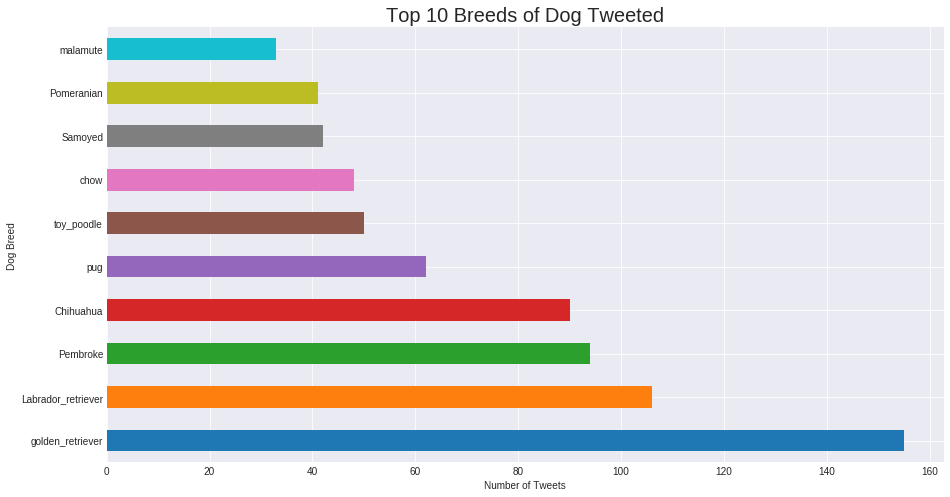

In [185]:
# Plot a horizontal bar chart to show top 10 breeds tweeted
fig = plt.figure(figsize=(15,8))
df_merged.prediction.value_counts().nlargest(10).plot(kind='barh')
plt.title("Top 10 Breeds of Dog Tweeted",fontsize=20)
plt.ylabel("Dog Breed")
plt.xlabel("Number of Tweets")

fig = plt.gcf()
fig.savefig('Top_10_Breeds_of_Dog_Tweeted.png', bbox_inches='tight');

###### Findings

Which breeds are most tweeted about?

**golden_retriever**

In [186]:
df_merged.rating.nlargest(10)

9      1.4
21     1.4
36     1.4
49     1.4
64     1.4
95     1.4
100    1.4
113    1.4
130    1.4
145    1.4
Name: rating, dtype: float64

###### Findings

Which 10 breeds obtain the highest ratings?

**golden_retriever, black-and-tan_coonhound, Pembroke, bloodhound, Eskimo_dog, Chihuahua, French_bulldog, Samoyed, Gordon_setter, Pomeranian**

In [187]:
df_merged.favorite_count.nlargest(10)

305    132810
766    131075
58     107956
395    107015
108    106827
329     95450
93      85011
397     75639
134     75193
801     75163
Name: favorite_count, dtype: int64

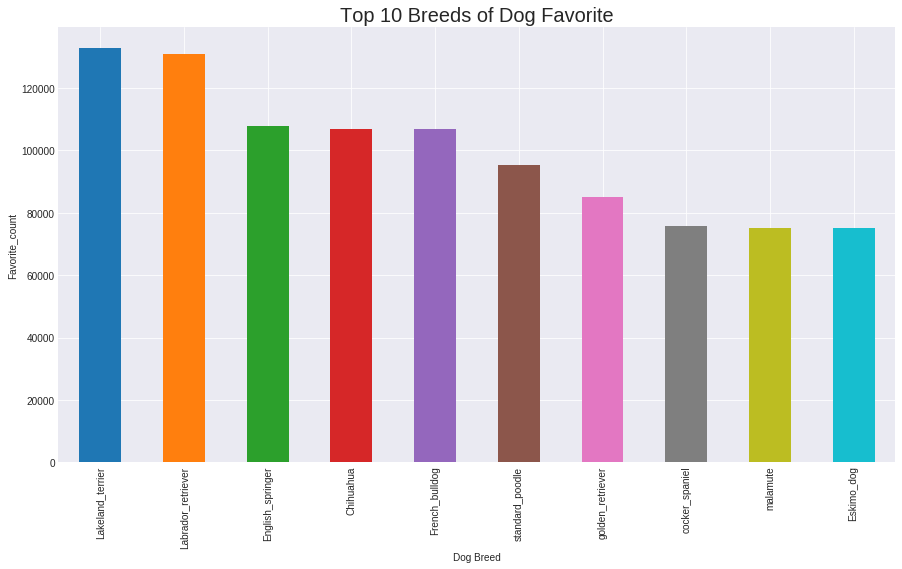

In [188]:
# Plot a horizontal bar chart to show top 10 breeds rating
fig = plt.figure(figsize=(15,8))
df_merged.groupby('prediction')['favorite_count'].max().sort_values(ascending=False).nlargest(10).plot(kind='bar')
plt.title("Top 10 Breeds of Dog Favorite",fontsize=20)
plt.ylabel("Favorite_count")
plt.xlabel("Dog Breed")

fig = plt.gcf()
fig.savefig('Top_10_Breeds_of_Dog_Favorite.png', bbox_inches='tight');

###### Finding

Which breeds receive most likes on average?

**Lakeland_terrier**

### Insight Two & visualization

Retweets & Favorite over time

In [189]:
# Create copy of twitter_archive_clean to work off of using only my variables of interest
time_df = df_merged[['year', 'month', 'day', 'retweet_count', 'favorite_count', 'rating']].copy()

In [190]:
# Set the index to be the timestamp so time is displayed properly in plots
time_df.set_index(['year', 'month', 'day'], inplace=True)

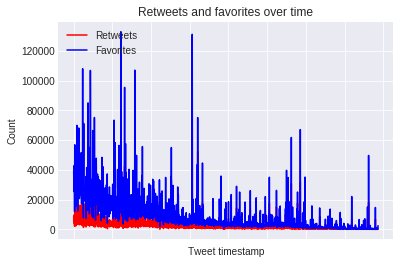

In [191]:
time_df['retweet_count'].plot(color = 'red', label='Retweets')
time_df['favorite_count'].plot(color = 'blue', label='Favorites')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')

fig = plt.gcf()
fig.savefig('Retweets_and_favorites_over_time.png', bbox_inches='tight');

###### Finding

 - favorites are degrading by time but still much greater in number than retweets
 - retweets also degrading by time 

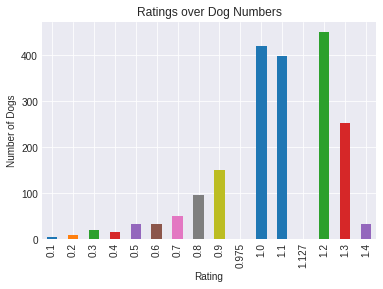

In [192]:
time_df['rating'].value_counts().sort_index().plot(kind='bar', label='Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Dogs')
plt.title('Ratings over Dog Numbers')

fig = plt.gcf()
fig.savefig('Ratings_over_Dog_Numbers.png', bbox_inches='tight');

###### Finding

 - 1.4 is the highest rating ratio. However, 1.2 is the highest rating with highiest do number

### Insight Three & visualization

does rating dogs attract audiance all the time or it was just a trend in a specific time?

In [ ]:
df_merged['followers_count'].groupby([df_merged['year'],df_merged['month']]).count().plot(kind='line')
plt.title('number of followers per time', size=20)
plt.xlabel('Time (Year, Month)')
plt.ylabel('Number of followers')

fig = plt.gcf()
fig.savefig('number_of_followers_over_time.png', bbox_inches='tight');

###### Finding

 - Apparently,  WeRateDogs was a trend in the past which have a specific number of audiance. But, it doesn't attract audiance that much with time